In [46]:
import keras 
# from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [47]:
from keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = '/Users/sathvikchowdaryveerapaneni/Desktop/GitHub/Machine_Learning_101/Image_Classification_101/Animals'

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             validation_split=0.2,
                             horizontal_flip = True)

# Create the training set
training_set = datagen.flow_from_directory(dataset_path,
                                           target_size = (224, 224),
                                           batch_size = 8,
                                           subset="training",
                                           class_mode = 'categorical')

# Create the validation set
validation_set = datagen.flow_from_directory(dataset_path,
                                             target_size = (224, 224),
                                             batch_size = 8,
                                             subset="validation",
                                             class_mode = 'categorical')

# Calculate the step size for training and validation
STEP_SIZE_TRAIN = training_set.n // training_set.batch_size
STEP_SIZE_VALID = validation_set.n // validation_set.batch_size


Found 138 images belonging to 5 classes.
Found 32 images belonging to 5 classes.


In [48]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False
 
x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [49]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]
start = datetime.now()
history = model.fit(training_set, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    epochs = 15, verbose=5, 
                    validation_data = validation_set, 
                    validation_steps = STEP_SIZE_VALID)
duration = datetime.now() - start
print("Training completed in time: ", duration)


model.save('VGG16.h5')

Epoch 1/15


2024-02-06 11:19:37.927671: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Training completed in time:  0:00:21.081568


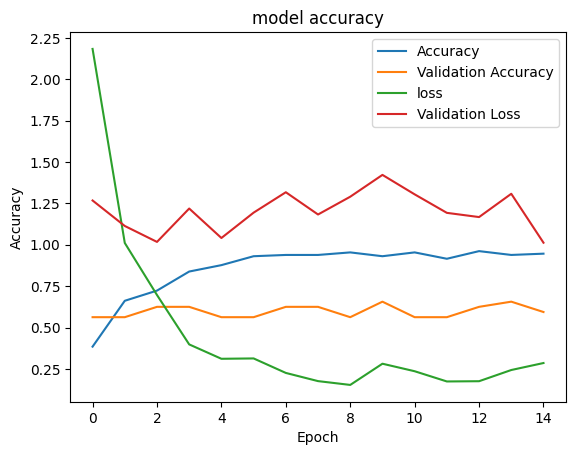

In [50]:
# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [51]:
import os
import random
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('VGG16.h5')

# Define the path to your dataset
dataset_path = '/Users/sathvikchowdaryveerapaneni/Desktop/GitHub/Machine_Learning_101/Image_Classification_101/Test'

# Get the list of all classes
classes = os.listdir(dataset_path)

# Select a random class
true_label = random.choice(classes)

# Select a random image from the chosen class
image_path = random.choice(os.listdir(os.path.join(dataset_path, true_label)))
image_path = os.path.join(dataset_path, true_label, image_path)

# Load the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)
predicted_label = classes[np.argmax(prediction)]




1/1 [==============================] - 0s 110ms/step


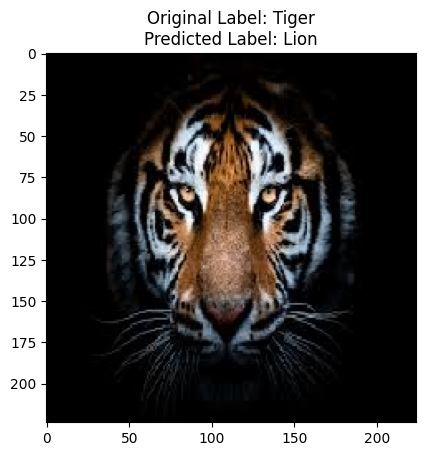

The prediction is incorrect.


In [52]:
# Display the image and the labels
plt.imshow(img)
plt.title(f'Original Label: {true_label}\nPredicted Label: {predicted_label}')
plt.show()

# Print whether the prediction was correct
if true_label == predicted_label:
    print("The prediction is correct.")
else:
    print("The prediction is incorrect.")

In [53]:
# Make a prediction
prediction = model.predict(img_array)

# Get the index of the class with the highest probability
predicted_index = np.argmax(prediction)

# Get the highest probability
max_probability = prediction[0][predicted_index]

# Convert the probability to percentage
percentage = max_probability * 100

# Get the predicted label
predicted_label = classes[predicted_index]

# Print the result
print(f"The model is {percentage:.2f}% sure that the image belongs to the class '{predicted_label}'.")


1/1 [==============================] - 0s 20ms/step
The model is 100.00% sure that the image belongs to the class 'Lion'.


# Our Model is not 100% accurate, but it is a good start.